# Lausanne Traffic Network Analysis

Download and analyze the road network of Lausanne for traffic simulation.

In [19]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

In [27]:
# Download and merge all network types for Lausanne and surrounding communes
communes = [
    "Lausanne, Switzerland",
    "Bussigny, Switzerland", "Chavannes-près-Renens, Switzerland", "Crissier, Switzerland",
    "Ecublens, Switzerland", "Prilly, Switzerland", "Renens, Switzerland",
    "Saint-Sulpice, Switzerland", "Villars-Sainte-Croix, Switzerland",
    "Cheseaux-sur-Lausanne, Switzerland", "Épalinges, Switzerland", "Jouxtens-Mézery, Switzerland",
    "Le Mont-sur-Lausanne, Switzerland", "Romanel-sur-Lausanne, Switzerland",
    "Belmont-sur-Lausanne, Switzerland", "Lutry, Switzerland", "Paudex, Switzerland", "Pully, Switzerland"
 ]

# Download and merge networks for each type
from networkx import compose_all

merged_networks = {}
for net_type in ['drive', 'walk', 'bike']:
    graphs = [ox.graph_from_place(place, network_type=net_type) for place in communes]
    merged_networks[net_type] = compose_all(graphs)

# Default to merged drive network for visualization
G = merged_networks['drive']

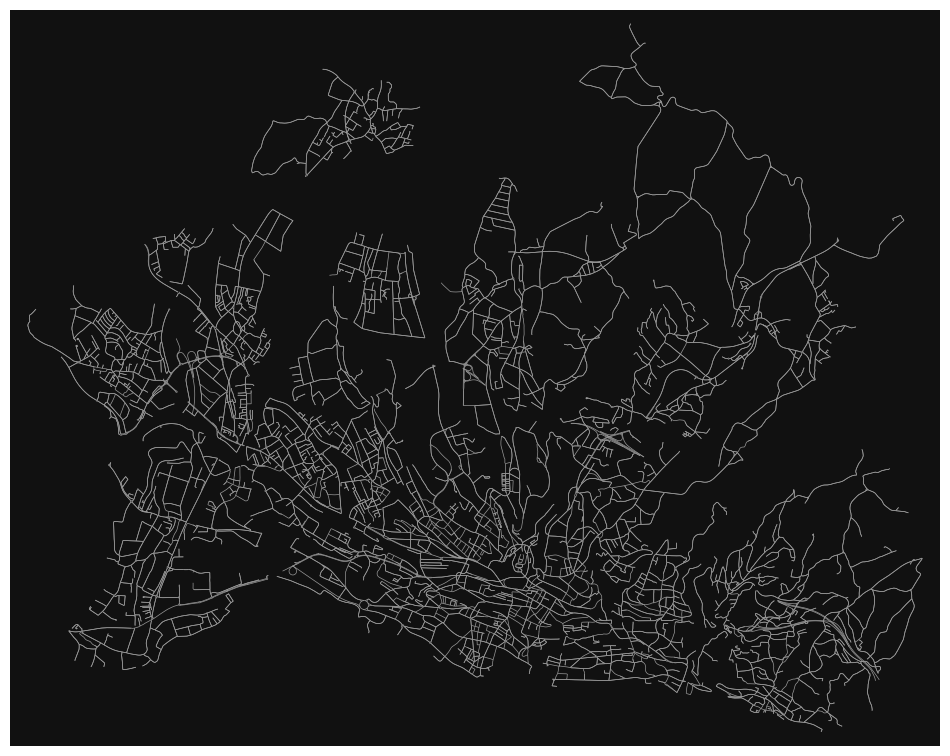

In [28]:
# Visualize network
fig, ax = ox.plot_graph(G, figsize=(12, 12), node_size=0, edge_linewidth=0.5)

Bounding box: [ 6.5361596 46.4991489  6.7180473 46.5991119]


<Axes: >

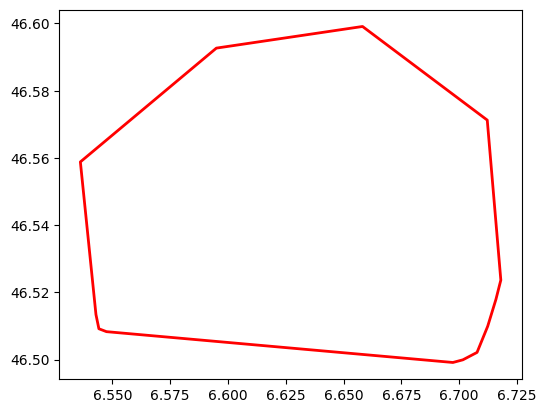

In [33]:
# Get bounding box and convex hull of the merged network
import geopandas as gpd
from shapely.geometry import MultiPoint
nodes, _ = ox.graph_to_gdfs(G)
bbox = nodes.total_bounds  # (minx, miny, maxx, maxy)
print(f"Bounding box: {bbox}")
hull = MultiPoint(nodes.geometry.values).convex_hull
gdf_hull = gpd.GeoDataFrame(geometry=[hull], crs=nodes.crs)
gdf_hull.plot(facecolor='none', edgecolor='red', linewidth=2)

In [38]:
hull_wkt = gdf_hull.geometry.iloc[0].wkt
print(hull_wkt)

POLYGON ((6.6973149 46.4991489, 6.5474464 46.508319, 6.5441708 46.5091808, 6.5429015 46.5134131, 6.5361596 46.5588201, 6.5949948 46.5926757, 6.6582251 46.5991119, 6.7121747 46.571259, 6.7180473 46.5236707, 6.7159339 46.5179337, 6.7123702 46.5099251, 6.7077559 46.5021425, 6.7016307 46.4999401, 6.6973149 46.4991489))


In [29]:
# Inspect graph properties
sample_edge = list(G.edges(data=True))[0]
print("Sample edge attributes:", sample_edge[2].keys())

Sample edge attributes: dict_keys(['osmid', 'highway', 'maxspeed', 'name', 'oneway', 'ref', 'reversed', 'length', 'geometry'])


In [ ]:
# Compare network sizes
for name, graph in merged_networks.items():
    length_km = sum(d['length'] for _, _, d in graph.edges(data=True)) / 1000
    print(f"{name:8} - Nodes: {len(graph.nodes):>5,} | Edges: {len(graph.edges):>6,} | Length: {length_km:>6.1f} km")

drive    - Nodes: 1,343 | Edges:  3,020 | Length:  398.4 km
walk     - Nodes: 16,483 | Edges: 41,884 | Length: 1355.7 km
bike     - Nodes: 8,576 | Edges: 18,999 | Length: 1135.7 km


In [31]:
# Save networks to disk
for name, graph in merged_networks.items():
    ox.save_graphml(graph, f"lausanne_{name}.graphml")
print("Saved:", ", ".join(f"lausanne_{name}.graphml" for name in merged_networks.keys()))

Saved: lausanne_drive.graphml, lausanne_walk.graphml, lausanne_bike.graphml


In [32]:
# Export networks for QGIS (GeoPackage format)
for name, graph in merged_networks.items():
    nodes, edges = ox.graph_to_gdfs(graph)
    nodes.to_file(f"lausanne_{name}_nodes.gpkg", layer="nodes", driver="GPKG")
    edges.to_file(f"lausanne_{name}_edges.gpkg", layer="edges", driver="GPKG")
print("Exported GeoPackages for QGIS.")

Exported GeoPackages for QGIS.
